<h1><center>Rocket Company Cluster Analysis</center></h1>

<center><img src="https://cdn.dribbble.com/users/458522/screenshots/15507200/media/824d27ff2f0717d36ec52d443ca478ff.png?compress=1&resize=300x300&vertical=top"></center>

<center> credit img : https://dribbble.com/shots/15507200-Rocket </center>

In [3]:
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

## Cleaning data

In [4]:
df = pd.read_csv('Space_Corrected.csv')
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
def extract_country_name(location):
    country = location.split(',')[-1]
    country = country.strip()
    return country

countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

In [6]:
df['Country'] = df['Location'].apply(lambda x: extract_country_name(x))
df['Country'] = df['Country'].replace(countries_dict)

In [7]:
df['Datum'] = pd.to_datetime(df['Datum'], utc=True)
df['year'] = df['Datum'].apply(lambda datetime: datetime.year)
df['month'] = df['Datum'].apply(lambda datetime: datetime.month)
df['weekday'] = df['Datum'].apply(lambda datetime: datetime.weekday())
df['time'] = df['Datum'].apply(lambda datetime: datetime.time)
df['date'] = df['Datum'].apply(lambda datetime: datetime.date)

In [8]:
def getVehicles(detail):
    lv = []
    li = [x.strip() for x in detail.split('|')] #extracting the name of all launch vehicles from the Details section
    for ele in li:
        if('Cosmos' in ele):
            lv.append('Cosmos')
        elif('Vostok' in ele):
            lv.append('Vostok')
        elif('Tsyklon' in ele):
            lv.append('Tsyklon')
        elif('Ariane' in ele):
            lv.append('Ariane')
        elif('Atlas' in ele):
            lv.append('Atlas')
        elif('Soyuz' in ele):
            lv.append('Soyuz')
        elif('Delta' in ele):
            lv.append('Delta')
        elif('Titan' in ele):
            lv.append('Titan')
        elif('Molniya' in ele):
            lv.append('Molniya')
        elif('Zenit' in ele):
            lv.append('Zenit')
        elif('Falcon' in ele):
            lv.append('Falcon')
        elif('Long March' in ele):
            lv.append('Long March')
        elif('PSLV' in ele):
            lv.append('PSLV')
        elif('GSLV' in ele):
            lv.append('GSLV')
        elif('Thor' in ele):
            lv.append('Thor')
        else:
            lv.append('Other')
    return lv
df['Launch Vehicles'] = df['Detail'].apply(lambda x:getVehicles(x))

In [9]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,year,month,weekday,time,date,Launch Vehicles
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,8,4,05:12:00,2020-08-07,"[Falcon, Other]"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,8,3,04:01:00,2020-08-06,"[Long March, Other]"
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8,1,23:57:00,2020-08-04,"[Other, Other]"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,7,3,21:25:00,2020-07-30,"[Other, Other]"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,7,3,11:50:00,2020-07-30,"[Atlas, Other]"


In [10]:
df['Country']=df['Location'].apply(lambda x : x.split()[-1])
df['City']=df['Location'].apply(lambda x : x.split()[-2])
df['hour']=df['time'].apply(lambda x : str(x).split(':')[0]).astype(int)
df.dropna(inplace=True)
df[' Rocket'] = df[' Rocket'].apply(lambda x: str(x).replace(',',''))
df[' Rocket'] = df[' Rocket'].astype('float64')
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,year,month,weekday,time,date,Launch Vehicles,City,hour
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,8,4,05:12:00,2020-08-07,"[Falcon, Other]","Florida,",5
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,8,3,04:01:00,2020-08-06,"[Long March, Other]","Center,",4
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,7,3,21:25:00,2020-07-30,"[Other, Other]","Cosmodrome,",21
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,7,3,11:50:00,2020-07-30,"[Atlas, Other]","Florida,",11
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020,7,5,03:13:00,2020-07-25,"[Long March, Other]","Center,",3


In [11]:
columns = ['Company Name', 'Status Rocket', ' Rocket', 'Status Mission', 'Country','year','month','weekday','City', 'hour',
           'date']
data = df.set_index(columns).apply(lambda x: pd.Series(x['Launch Vehicles']), axis=1).stack().dropna().reset_index()
data.drop('level_11', axis=1, inplace=True)

In [12]:
data.drop_duplicates(inplace=True)
data.head()

,Company Name,Status Rocket,Rocket,Status Mission,Country,year,month,weekday,City,hour,date,0
0,SpaceX,StatusActive,50.00,Success,USA,2020,8,4,"Florida,",5,2020-08-07,Falcon
1,SpaceX,StatusActive,50.00,Success,USA,2020,8,4,"Florida,",5,2020-08-07,Other
2,CASC,StatusActive,29.75,Success,China,2020,8,3,"Center,",4,2020-08-06,Long March
3,CASC,StatusActive,29.75,Success,China,2020,8,3,"Center,",4,2020-08-06,Other
4,Roscosmos,StatusActive,65.00,Success,Kazakhstan,2020,7,3,"Cosmodrome,",21,2020-07-30,Other


In [13]:
data_dummy = data.drop(['Company Name','date'], axis=1)
data_dummy = pd.get_dummies(data_dummy, drop_first=True)
data_dummy.head()

,Rocket,year,month,weekday,hour,Status Rocket_StatusRetired,Status Mission_Partial Failure,Status Mission_Prelaunch Failure,Status Mission_Success,Country_China,...,0_Cosmos,0_Delta,0_Falcon,0_GSLV,0_Long March,0_Other,0_PSLV,0_Soyuz,0_Thor,0_Titan
0,50.00,2020,8,4,5,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,50.00,2020,8,4,5,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,29.75,2020,8,3,4,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,29.75,2020,8,3,4,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,65.00,2020,7,3,21,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
data_dummy['Company'] = data['Company Name']
data_dummy2 = data_dummy[['Company', ' Rocket', 'month', 'weekday', 'hour']].groupby('Company', as_index=False).mean()
data_max_year = data_dummy[['Company', 'year']].groupby('Company', as_index=False).max()
data_min_year = data_dummy[['Company', 'year']].groupby('Company', as_index=False).min()
data_dummy3 = data_dummy.drop([' Rocket', 'year', 'month', 'weekday', 'hour'], axis=1).groupby('Company', as_index=False).sum()
data_dummy2 = data_dummy2.merge(data_dummy3, on='Company', how='left')
data_dummy2 = data_dummy2.merge(data_max_year, on='Company', how='left')
data_dummy2 = data_dummy2.merge(data_min_year, on='Company', how='left')
data_dummy2.head()

,Company,Rocket,month,weekday,hour,Status Rocket_StatusRetired,Status Mission_Partial Failure,Status Mission_Prelaunch Failure,Status Mission_Success,Country_China,...,0_Falcon,0_GSLV,0_Long March,0_Other,0_PSLV,0_Soyuz,0_Thor,0_Titan,year_x,year_y
0,Arianespace,179.938547,7.094972,3.039106,18.094972,6.0,2.0,0.0,173.0,0.0,...,1.0,0.0,0.0,94.0,0.0,4.0,2.0,0.0,2020,2002
1,Boeing,177.285714,8.000000,2.428571,14.857143,12.0,2.0,0.0,12.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2006,2002
2,CASC,40.298786,7.309904,2.776358,10.664537,0.0,6.0,0.0,301.0,311.0,...,0.0,0.0,156.0,157.0,0.0,0.0,0.0,0.0,2020,1982
3,EER,20.000000,10.000000,0.000000,22.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1995,1995
4,ESA,37.000000,2.000000,0.000000,10.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2012,2012


In [15]:
Company = np.array(data_dummy2['Company'])
data_dummy4 = data_dummy2.drop('Company', axis=1)
data_dummy4.head()

,Rocket,month,weekday,hour,Status Rocket_StatusRetired,Status Mission_Partial Failure,Status Mission_Prelaunch Failure,Status Mission_Success,Country_China,Country_Facility,...,0_Falcon,0_GSLV,0_Long March,0_Other,0_PSLV,0_Soyuz,0_Thor,0_Titan,year_x,year_y
0,179.938547,7.094972,3.039106,18.094972,6.0,2.0,0.0,173.0,0.0,0.0,...,1.0,0.0,0.0,94.0,0.0,4.0,2.0,0.0,2020,2002
1,177.285714,8.000000,2.428571,14.857143,12.0,2.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2006,2002
2,40.298786,7.309904,2.776358,10.664537,0.0,6.0,0.0,301.0,311.0,0.0,...,0.0,0.0,156.0,157.0,0.0,0.0,0.0,0.0,2020,1982
3,20.000000,10.000000,0.000000,22.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1995,1995
4,37.000000,2.000000,0.000000,10.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2012,2012


## Hierarchical Cluster
<a id="1"></a>

In [16]:
# script from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

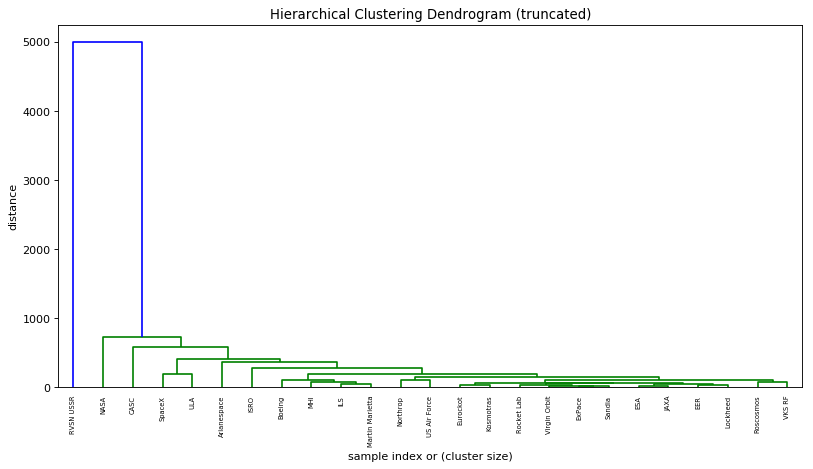

In [17]:
figure(figsize=(12, 6), dpi=80)

normalized_X = normalize(data_dummy4)

# Calculate the linkage: mergings
mergings = linkage(data_dummy4, method='complete')

# Plot the dendrogram
fancy_dendrogram(mergings, labels=Company, leaf_rotation=90, leaf_font_size=6)

plt.show()

In [18]:
data_dummy5 = data_dummy2[data_dummy2['Company']!='RVSN USSR']
Company2 = np.array(data_dummy5['Company'])
data_dummy6 = data_dummy5.drop('Company', axis=1)
data_dummy6.head()

,Rocket,month,weekday,hour,Status Rocket_StatusRetired,Status Mission_Partial Failure,Status Mission_Prelaunch Failure,Status Mission_Success,Country_China,Country_Facility,...,0_Falcon,0_GSLV,0_Long March,0_Other,0_PSLV,0_Soyuz,0_Thor,0_Titan,year_x,year_y
0,179.938547,7.094972,3.039106,18.094972,6.0,2.0,0.0,173.0,0.0,0.0,...,1.0,0.0,0.0,94.0,0.0,4.0,2.0,0.0,2020,2002
1,177.285714,8.000000,2.428571,14.857143,12.0,2.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2006,2002
2,40.298786,7.309904,2.776358,10.664537,0.0,6.0,0.0,301.0,311.0,0.0,...,0.0,0.0,156.0,157.0,0.0,0.0,0.0,0.0,2020,1982
3,20.000000,10.000000,0.000000,22.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1995,1995
4,37.000000,2.000000,0.000000,10.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2012,2012


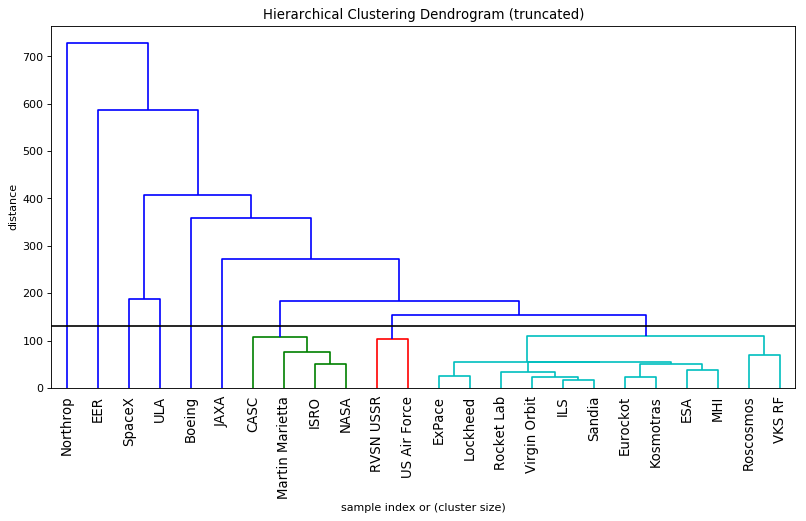

In [19]:
figure(figsize=(12, 6), dpi=80)

normalized_X = normalize(data_dummy6)
mergings = linkage(data_dummy6, method='complete')

# Plot the dendrogram
fancy_dendrogram(mergings, labels=Company, leaf_rotation=90, leaf_font_size=6, max_d=130)
plt.xticks(fontsize = 12)

plt.show()

In [20]:
data_dummy5['labels'] = fcluster(mergings, 130, criterion='distance')
data_dummy5['labels'].value_counts()

C:\Users\IDMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


5    12
3     4
4     2
9     1
8     1
7     1
6     1
2     1
1     1
Name: labels, dtype: int64

In [21]:
data = data.merge(data_dummy5[['Company', 'labels']], left_on='Company Name', right_on='Company', how='left')

In [22]:
data.loc[data['labels']<=2,'labels']=2
data.loc[data['labels']>=6,'labels']=2
data['labels'].fillna(1, inplace=True)
data.head()

,Company Name,Status Rocket,Rocket,Status Mission,Country,year,month,weekday,City,hour,date,0,Company,labels
0,SpaceX,StatusActive,50.00,Success,USA,2020,8,4,"Florida,",5,2020-08-07,Falcon,SpaceX,2.0
1,SpaceX,StatusActive,50.00,Success,USA,2020,8,4,"Florida,",5,2020-08-07,Other,SpaceX,2.0
2,CASC,StatusActive,29.75,Success,China,2020,8,3,"Center,",4,2020-08-06,Long March,CASC,2.0
3,CASC,StatusActive,29.75,Success,China,2020,8,3,"Center,",4,2020-08-06,Other,CASC,2.0
4,Roscosmos,StatusActive,65.00,Success,Kazakhstan,2020,7,3,"Cosmodrome,",21,2020-07-30,Other,Roscosmos,5.0


In [23]:
data['Status Rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

## EDA
<a id="2"></a>

In [24]:
colors = ['#0504aa','#f3c33c','#255e79','#267778']

In [93]:
def explode_1(size):
    expl = []
    for i in range (0,size):
        if i==0:
            expl.extend([0.2])
        else:
            expl.extend([0])
    return expl

def explode_2(size):
    expl = []
    for i in range (0,size):
        if i==0:
            expl.extend([0.1])
        else:
            expl.extend([0])
    return expl

In [121]:
def Cluster_EDA(lab):
    data_clust = data[data['labels']==lab]
    company = data_clust['Company Name'].unique()
    company = company.reshape(len(company), 1)
    
    status = data_clust['Status Mission'].value_counts()
    size_status = len(data_clust['Status Mission'].unique())
    
    status_rocket = data_clust['Status Rocket'].value_counts()
    size_rocket = len(data_clust['Status Rocket'].unique())
    
    Vehicles = data_clust[0].value_counts()
    size_vech = len(data_clust[0].unique())
    
    rocket = data_clust[' Rocket']

    date = data_clust[['year',' Rocket']].groupby('year', as_index=False).count()
    month = data_clust[['month',' Rocket']].groupby('month', as_index=False).count()
    day = data_clust[['weekday',' Rocket']].groupby('weekday', as_index=False).count()
    hour = data_clust[['hour',' Rocket']].groupby('hour', as_index=False).count()

    Country = data_clust[['Country',' Rocket']].groupby('Country', as_index=False).count()

    fig = plt.figure(figsize=(15, 20))
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    rows = 5
    columns = 3
    grid = plt.GridSpec(rows, columns, wspace = .3,hspace = .3)

    fig.suptitle('Cluster '+str(lab), fontweight='bold', fontsize = 15)

    a=("Company Name")
    plt.subplot(grid[0, 0])
    plt.axis('tight')
    plt.axis('off')
    plt.table(cellText=company,loc='center', cellLoc='center')
    plt.title("Company Name", fontweight='bold')

    plt.subplot(grid[0, 1:])
    plt.bar(Country['Country'],Country[' Rocket'],color='#0504aa')
    plt.grid(True)
    plt.title("Country", fontweight='bold')

    plt.subplot(grid[1, 0])
    _, _, autotexts =  plt.pie(status, labels=status.index, autopct='%1.1f%%', shadow=True, explode=explode_1(size_status),
                               textprops={'fontsize': 12,'color': 'black'}, colors = colors, wedgeprops=dict(edgecolor='w'), 
                               startangle=180)
    for ins in autotexts:
        ins.set_color('white')
    plt.title("Percentage Status Mission", fontweight='bold')

    plt.subplot(grid[1, 1])
    _, _, autotexts =  plt.pie(status_rocket, labels=status_rocket.index, autopct='%1.1f%%', shadow=True, startangle=50,
                       explode=explode_2(size_rocket), textprops={'fontsize': 12, 'color': 'black'}, colors = colors,
                       wedgeprops=dict(edgecolor='w'))
    for ins in autotexts:
        ins.set_color('white')
    plt.title("Percentage Status Rocket", fontweight='bold')

    plt.subplot(grid[1, 2])
    _, _, autotexts =  plt.pie(Vehicles, labels=Vehicles.index, autopct='%1.1f%%', shadow=True, explode=explode_2(size_vech),
                       textprops={'fontsize': 12, 'color': 'black'}, colors = colors, wedgeprops=dict(edgecolor='w'))
    for ins in autotexts:
        ins.set_color('white')
    plt.title("Percentage Vehicles", fontweight='bold')

    plt.subplot(grid[2, :])
    plt.boxplot(rocket, vert=False)
    plt.grid(True)
    plt.title("Box Plot Cost Space Mission", fontweight='bold')

    plt.subplot(grid[3, 1])
    plt.bar(month['month'],month[' Rocket'],color='#0504aa')
    plt.title(" Lauch Time Based on Month", fontweight='bold')
    plt.grid(True)

    plt.subplot(grid[3, 2])
    plt.bar(day['weekday'],day[' Rocket'],color='#f3c33c')
    plt.title(" Lauch Time Based on Weekday", fontweight='bold')
    plt.grid(True)

    plt.subplot(grid[3, 0])
    plt.bar(hour['hour'],hour[' Rocket'],color='#255e79')
    plt.title(" Lauch Time Based on Hour", fontweight='bold')
    plt.grid(True)

    plt.subplot(grid[4, :])
    plt.bar(date['year'],date[' Rocket'],color='#267778')
    plt.title(" Lauch Time Based on Year", fontweight='bold')
    plt.grid(True)

    plt.show()

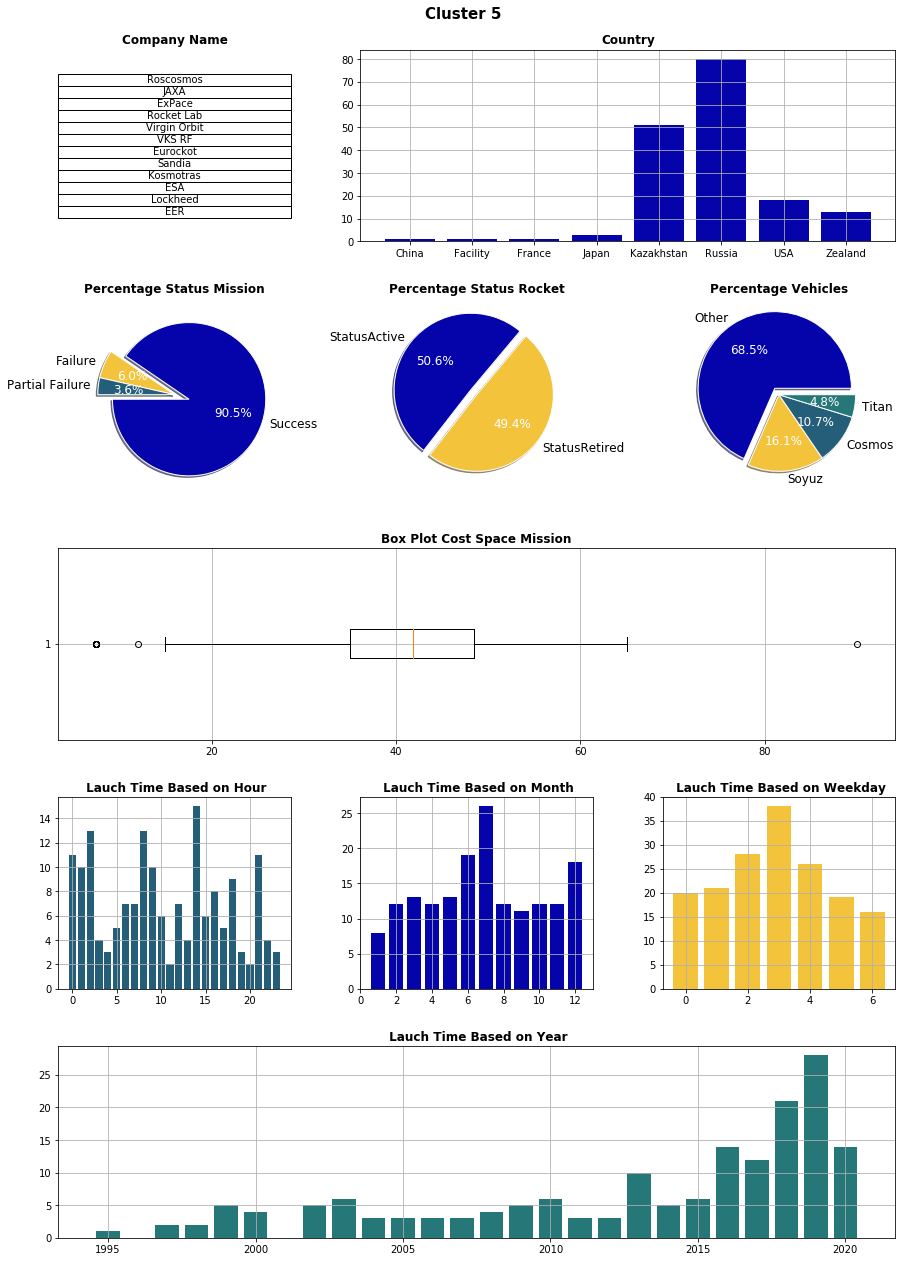

In [122]:
Cluster_EDA(5)

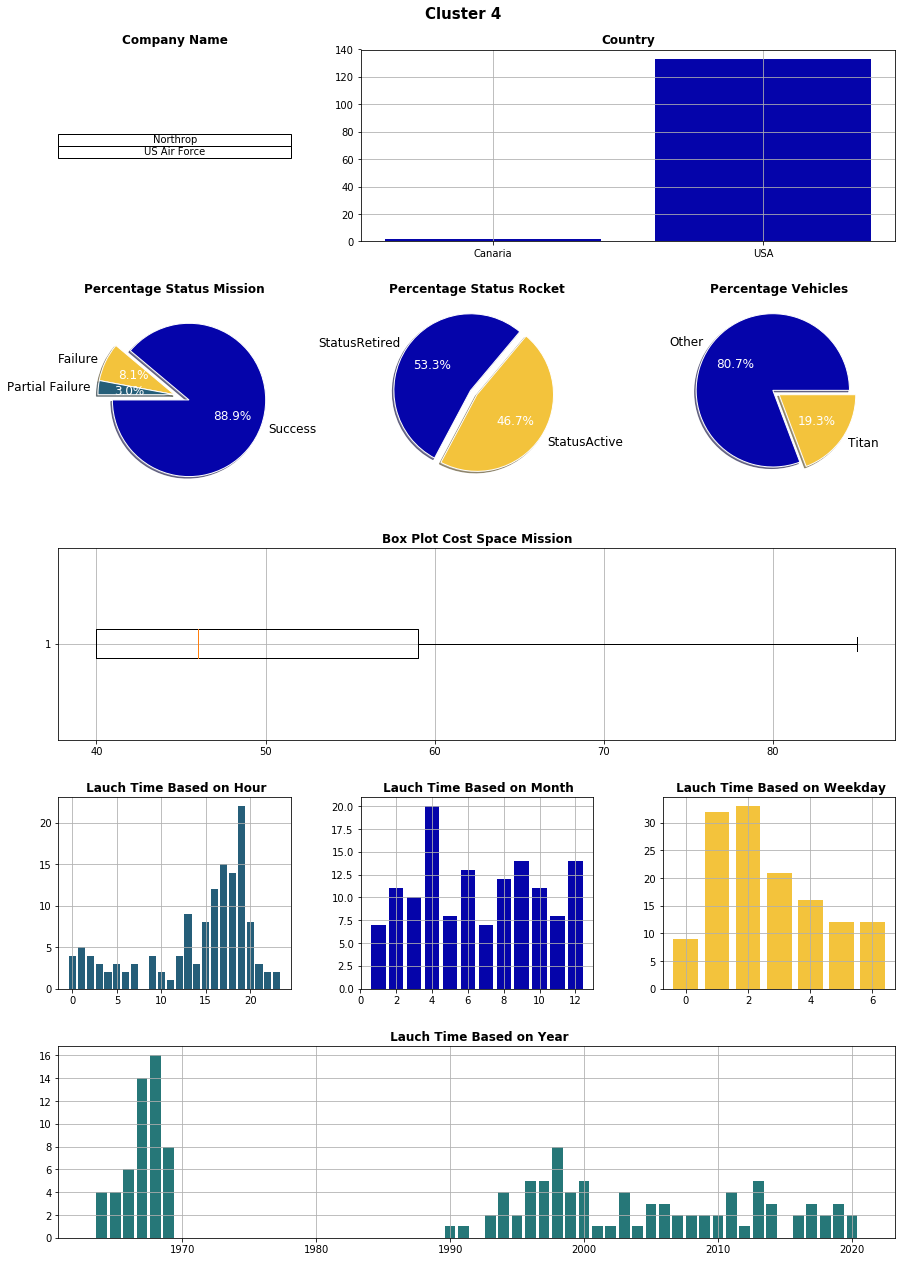

In [123]:
Cluster_EDA(4)

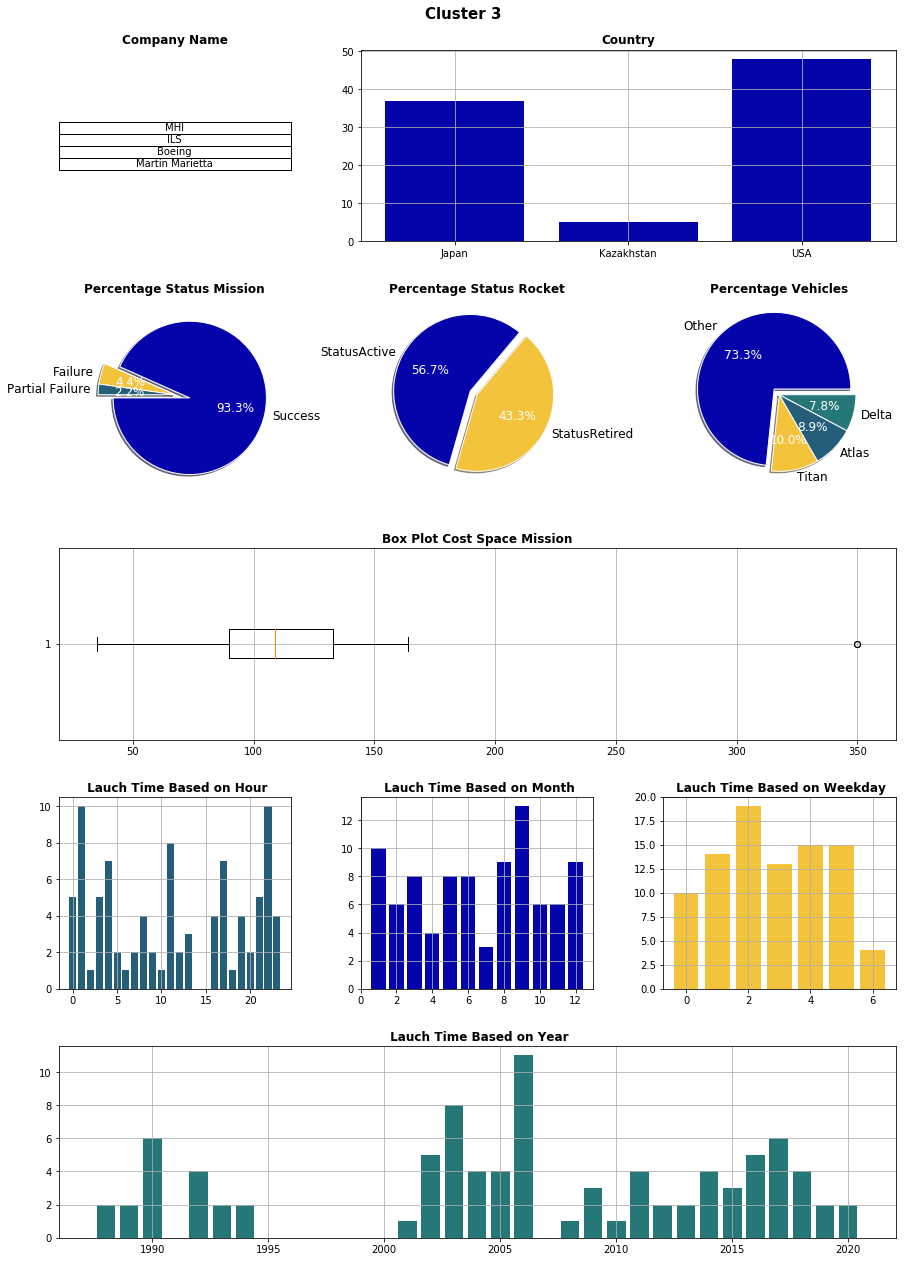

In [124]:
Cluster_EDA(3)

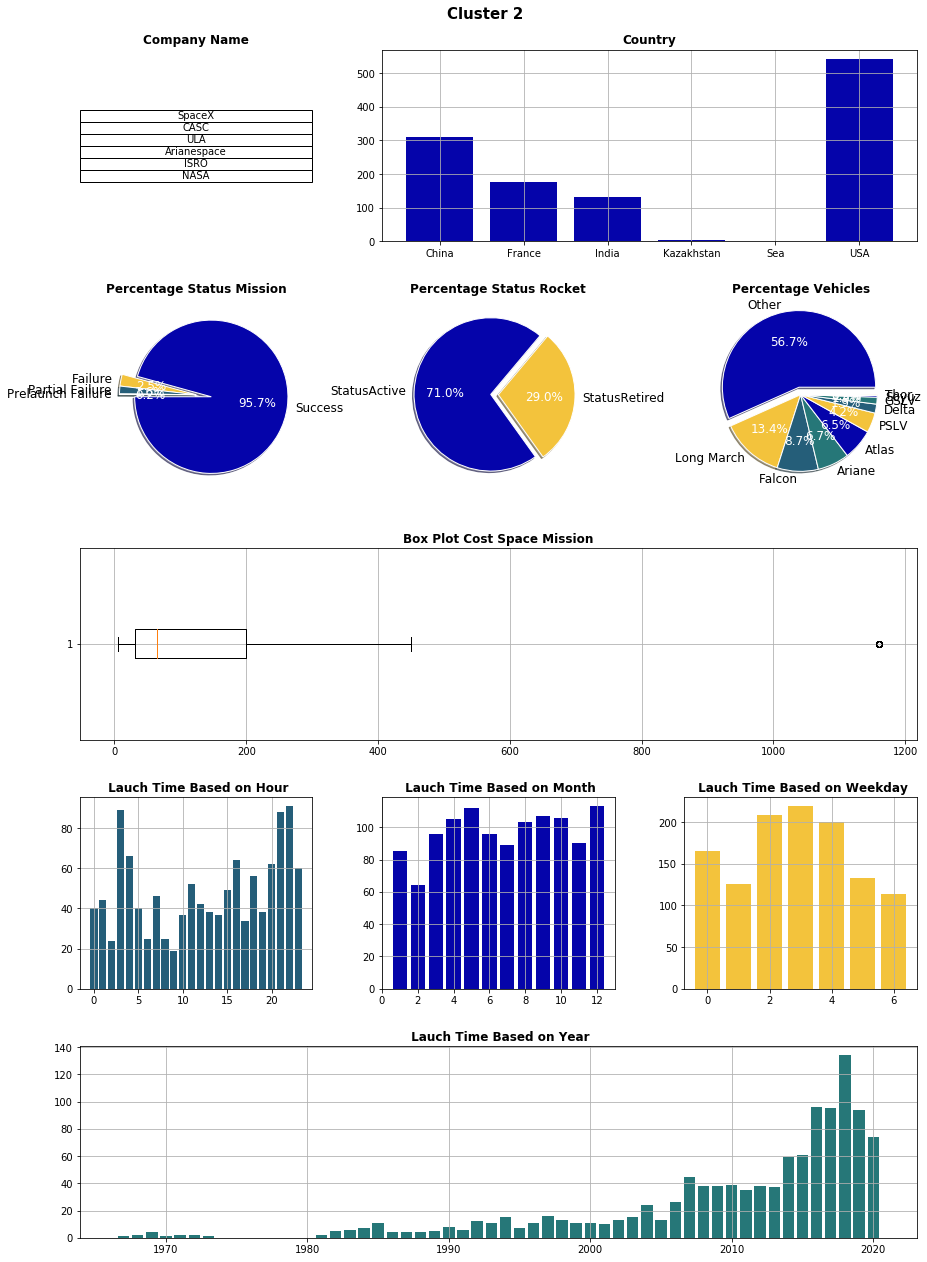

In [125]:
Cluster_EDA(2)